🎯 Desafio dia 77 — Reservas em Restaurante

📂 Dataset: desafio_dia_77_reservas_restaurante.csv

🔍 Contexto: Um restaurante está analisando as reservas realizadas ao longo da semana. Cada registro representa uma reserva com informações sobre o dia, o número de pessoas, o turno, a origem e o status da reserva.

🛠️ Tarefas do desafio:

🧹 Tratamento de dados
- Preencha os valores ausentes na coluna num_pessoas com a mediana da coluna.

- Preencha os valores ausentes na coluna origem_reserva com o valor mais frequente.

📊 Análise geral
- Qual o turno com mais reservas realizadas?

- Qual é a média de pessoas por reserva em cada status (Compareceu, Cancelou, etc.)?

📈 Visualização de dados
- Crie um gráfico de barras mostrando a quantidade de reservas por origem (origem_reserva), separadas por status (status_reserva).

🤖 Machine Learning - Classificação
- Crie um modelo de classificação para prever o status_reserva com base em:

    dia_semana, turno, num_pessoas e origem_reserva

    Use train_test_split, get_dummies, RandomForestClassifier e avalie o modelo com accuracy_score.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
df = pd.read_csv("desafio_dia_77_reservas_restaurante.csv")
df.head()

,id_reserva,dia_semana,turno,num_pessoas,origem_reserva,status_reserva
0,6001,Sexta,Almoço,4.0,Presencial,Não Compareceu
1,6002,Sexta,Jantar,1.0,Telefone,Compareceu
2,6003,Quinta,Jantar,3.0,Telefone,Compareceu
3,6004,Sábado,Almoço,4.0,App,Cancelou
4,6005,Segunda,Almoço,5.0,Site,Compareceu


In [4]:
#Preencha os valores ausentes na coluna num_pessoas com a mediana da coluna.
df["num_pessoas"] = df["num_pessoas"].fillna(df["num_pessoas"].median())
df["num_pessoas"].isna().sum()

0

In [5]:
#Preencha os valores ausentes na coluna origem_reserva com o valor mais frequente.
df["origem_reserva"] = df["origem_reserva"].fillna(df["origem_reserva"].mode()[0])
df["origem_reserva"].isna().sum()

0

In [7]:
#Qual o turno com mais reservas realizadas?
turno_reservas = df["turno"].value_counts()
print(turno_reservas)

turno
Almoço    321
Jantar    179
Name: count, dtype: int64


In [9]:
#Qual é a média de pessoas por reserva em cada status (Compareceu, Cancelou, etc.)?
media_pessoas_status_reserva = df.groupby("status_reserva")["num_pessoas"].mean().round(2)
print(media_pessoas_status_reserva)

status_reserva
Cancelou          3.29
Compareceu        3.17
Não Compareceu    2.79
Name: num_pessoas, dtype: float64


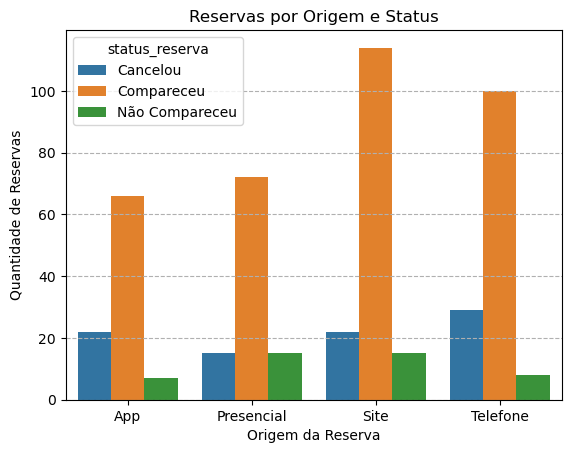

In [29]:
#Crie um gráfico de barras mostrando a quantidade de reservas por origem (origem_reserva), separadas por status (status_reserva).
contagem = df.groupby(["origem_reserva", "status_reserva"]).size().reset_index(name="contagem")
sns.barplot(contagem, x="origem_reserva", y="contagem", hue="status_reserva")
plt.title("Reservas por Origem e Status")
plt.xlabel("Origem da Reserva")
plt.ylabel("Quantidade de Reservas")
plt.grid(axis="y", linestyle="--")

In [33]:
#Crie um modelo de classificação para prever o status_reserva com base em:
X = df[["dia_semana", "turno", "num_pessoas", "origem_reserva"]]
y = df["status_reserva"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5866666666666667
